<a href="https://colab.research.google.com/github/essteer/data-science/blob/main/src/analysis/eda_world_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%html
<style>
table {float:left}
</style>

# Exploratory Data Analysis

## World data

This notebook applies EDA techniques to a dataset of country data: "world-data-2023.csv", available here on Kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023.

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Plot formats

In [ ]:
palette = {
    "dark": "#252b33", "grey": "#45464d", "light": "#fefeff",
    "stone": "#8f8f94", "blue": "#336681", "green": "#089389",
    "red": "#d34748", "pink": "#cf82d3", "yellow": "#e6daaa"
}
# Set plot defaults
sns.set_style(rc={"figure.facecolor": palette["dark"],
                  "axes.facecolor": palette["dark"],
                  "axes.edgecolor": palette["light"],
                  "grid.color": palette["grey"]})

In [ ]:
def format_plot(fig):
    """
    Applies custom theme to Plotly figure.
    """
    fig.update_layout(
        plot_bgcolor=palette["dark"], paper_bgcolor=palette["dark"],
        title_font_color=palette["light"],
        xaxis_title_font_color=palette["light"], yaxis_title_font_color=palette["light"],
        xaxis_tickfont_color=palette["stone"], yaxis_tickfont_color=palette["stone"],
        xaxis_gridcolor=palette["grey"], yaxis_gridcolor=palette["grey"],
        xaxis_linecolor=palette["stone"], yaxis_linecolor=palette["stone"],
        title={"x": 0.5},  # Center title
        xaxis={"categoryorder": "category ascending"},  # Set y-axis labels from low to high
        yaxis={
            "categoryorder": "category ascending",  # Set y-axis labels from low to high
            # Add invisible y-ticks to add space between y-axis and y-labels
            "ticks": "outside", "tickcolor": palette["dark"], "ticklen": 5,
        },
        legend_font_color=palette["stone"],
        margin=dict(l=80, r=20, t=40, b=20)
    )
    fig.update_yaxes(
        title_standoff = 5
    )

## Understand the data

In [ ]:
# Load world data csv
df = pd.read_csv("world-data-2023.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [ ]:
df.describe()

Birth Rate  Calling Code  Fertility Rate  Infant mortality  \
count  189.000000    194.000000      188.000000        189.000000   
mean    20.214974    360.546392        2.698138         21.332804   
std      9.945774    323.236419        1.282267         19.548058   
min      5.900000      1.000000        0.980000          1.400000   
25%     11.300000     82.500000        1.705000          6.000000   
50%     17.950000    255.500000        2.245000         14.000000   
75%     28.750000    506.750000        3.597500         32.700000   
max     46.080000   1876.000000        6.910000         84.500000   

       Life expectancy  Maternal mortality ratio  Physicians per thousand  \
count       187.000000                181.000000               188.000000   
mean         72.279679                160.392265                 1.839840   
std           7.483661                233.502024                 1.684261   
min          52.800000                  2.000000                 0.010000   
25%          67.000000                 13.000000                 0.332500   
50%          73.200000                 53.000000                 1.460000   
75%          77.500000                186.000000                 2.935000   
max          85.400000               1150.000000                 8.420000   

         Latitude   Longitude  
count  194.000000  194.000000  
mean    19.092351   20.232434  
std     23.961779   66.716110  
min    -40.900557 -175.198242  
25%      4.544175   -7.941496  
50%     17.273849   20.972652  
75%     40.124603   48.281523  
max     64.963051  178.065032

In [ ]:
df.iloc[[0, -1]]

Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0    Afghanistan               60           AF                58.10%   
194     Zimbabwe               38           ZW                41.90%   

    Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0          652,230           323,000       32.49          93.0   
194        390,757            51,000       30.68         263.0   

    Capital/Major City Co2-Emissions  ... Out of pocket health expenditure  \
0                Kabul         8,672  ...                           78.40%   
194             Harare        10,983  ...                           25.80%   

    Physicians per thousand  Population  \
0                      0.28  38,041,754   
194                    0.21  14,645,468   

     Population: Labor force participation (%) Tax revenue (%) Total tax rate  \
0                                       48.90%           9.30%         71.40%   
194                                     83.10%          20.70%         31.60%   

    Unemployment rate Urban_population   Latitude  Longitude  
0              11.12%        9,797,273  33.939110  67.709953  
194             4.95%        4,717,305 -19.015438  29.154857  

[2 rows x 35 columns]

In [ ]:
df[df.isnull().any(axis=1)]

Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
3                Andorra              164           AD                40.00%   
5    Antigua and Barbuda              223           AG                20.50%   
8              Australia                3           AU                48.20%   
9                Austria              109           AT                32.40%   
11           The Bahamas               39           BS                 1.40%   
..                   ...              ...          ...                   ...   
188           Uzbekistan               79           UZ                62.90%   
189              Vanuatu               25           VU                15.30%   
190            Venezuela               32           VE                24.50%   
192                Yemen               56           YE                44.60%   
194             Zimbabwe               38           ZW                41.90%   

    Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
3              468               NaN        7.20         376.0   
5              443                 0       15.33           1.0   
8        7,741,220            58,000       12.60          61.0   
9           83,871            21,000        9.70          43.0   
11          13,880             1,000       13.97           1.0   
..             ...               ...         ...           ...   
188        447,400            68,000       23.30         998.0   
189         12,189               NaN       29.60         678.0   
190        912,050           343,000       17.88          58.0   
192        527,968            40,000       30.45         967.0   
194        390,757            51,000       30.68         263.0   

         Capital/Major City Co2-Emissions  ...  \
3          Andorra la Vella           469  ...   
5    St. John's, Saint John           557  ...   
8                  Canberra       375,908  ...   
9                    Vienna        61,448  ...   
11          Nassau, Bahamas         1,786  ...   
..                      ...           ...  ...   
188                Tashkent        91,811  ...   
189               Port Vila           147  ...   
190                 Caracas       164,175  ...   
192                   Sanaa        10,609  ...   
194                  Harare        10,983  ...   

    Out of pocket health expenditure Physicians per thousand  Population  \
3                             36.40%                    3.33      77,142   
5                             24.30%                    2.76      97,118   
8                             19.60%                    3.68  25,766,605   
9                             17.90%                    5.17   8,877,067   
11                            27.80%                    1.94     389,482   
..                               ...                     ...         ...   
188                           42.70%                    2.37  33,580,650   
189                            8.90%                    0.17     299,882   
190                           45.80%                    1.92  28,515,829   
192                           81.00%                    0.31  29,161,922   
194                           25.80%                    0.21  14,645,468   

     Population: Labor force participation (%) Tax revenue (%) Total tax rate  \
3                                          NaN             NaN            NaN   
5                                          NaN          16.50%         43.00%   
8                                       65.50%          23.00%         47.40%   
9                                       60.70%          25.40%         51.40%   
11                                      74.60%          14.80%         33.80%   
..                                         ...             ...            ...   
188                                     65.10%          14.80%         31.60%   
189                                     69.90%          17.80%          8.50%   
190                 

In [ ]:
df[df["Abbreviation"].isnull()]

Country Density\n(P/Km2) Abbreviation  \
39            Republic of the Congo               16          NaN   
56                         Eswatini               67          NaN   
73                     Vatican City            2,003          NaN   
81              Republic of Ireland               72          NaN   
119                         Namibia                3          NaN   
128                 North Macedonia               83          NaN   
133  Palestinian National Authority              847          NaN   

    Agricultural Land( %) Land Area(Km2) Armed Forces size  Birth Rate  \
39                 31.10%        342,000            12,000       32.86   
56                    NaN         17,364               NaN         NaN   
73                    NaN              0               NaN         NaN   
81                 64.50%         70,273             9,000       12.50   
119                47.10%        824,292            16,000       28.64   
128                   NaN         25,713               NaN         NaN   
133                   NaN            NaN               NaN         NaN   

     Calling Code Capital/Major City Co2-Emissions  ...  \
39          242.0        Brazzaville         3,282  ...   
56          268.0            Mbabane           NaN  ...   
73          379.0       Vatican City           NaN  ...   
81          353.0             Dublin        37,711  ...   
119         264.0           Windhoek         4,228  ...   
128         389.0             Skopje           NaN  ...   
133           NaN                NaN           NaN  ...   

    Out of pocket health expenditure Physicians per thousand Population  \
39                            43.80%                    0.12  5,380,508   
56                            11.30%                     NaN  1,093,238   
73                               NaN                     NaN        836   
81                            15.20%                    3.31  5,007,069   
119                            8.30%                    0.42  2,494,530   
128                           35.60%                     NaN  1,836,713   
133                              NaN                     NaN        NaN   

     Population: Labor force participation (%) Tax revenue (%) Total tax rate  \
39                                      69.40%           9.00%         54.30%   
56                                         NaN          28.60%            NaN   
73                                         NaN             NaN            NaN   
81                                      62.10%          18.30%         26.10%   
119                                     59.50%          27.10%         20.70%   
128                                        NaN             NaN            NaN   
133                                        NaN             NaN            NaN   

    Unemployment rate Urban_population   Latitude  Longitude  
39              9.47%        3,625,010  -0.228021  15.827659  
56                NaN              NaN -26.522503  31.465866  
73                NaN              NaN  41.902916  12.453389  
81              4.93%        3,133,123  53.412910  -8.243890  
119            20.27%        1,273,258 -22.957640  18.490410  
128               NaN              NaN  41.608635  21.745275  
133               NaN              NaN  31.952162  35.233154  

[7 rows x 35 columns]

In [ ]:
print(df["Country"].values)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'The Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Ivory Coast' 'Cape Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Republic of the Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'The Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Vatican City' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Republic of Ireland' 'Israel' 'Italy' '

### Comment

The dataset contains 195 rows, consisting of data for the 193 UN Member States plus Vatican City and the Palestinian National Authority.

35 rows are missing data across at least one of the 35 columns; 7 rows are missing an entry under the Abbreviation column.

Most of the columns appear to be intended for numeric data, but are currently encoded as Object types.

## Clean the data

### Add missing labels

I will fill in the missing Abbreviations for the UN Member State entries, since this column can then be used to look up the 3-letter ISO codes for each country; the 3-letter ISO codes will be used with Plotly's world map charts later on.

In [ ]:
# Rename Density column for easier manipulation
df.rename(columns={"Density\n(P/Km2)": "Density (P/Km2)"}, inplace=True)

In [ ]:
# Update 2-letter ISO codes for UN Member States with missing values
idx_to_update = [39, 56, 81, 110, 128]
new_vals = ["CG", "SZ", "IE", "NA", "MK"]

In [ ]:
df.loc[idx_to_update, "Abbreviation"] = new_vals

In [ ]:
df[df["Abbreviation"].isnull()]

Country Density (P/Km2) Abbreviation  \
73                     Vatican City           2,003          NaN   
119                         Namibia               3          NaN   
133  Palestinian National Authority             847          NaN   

    Agricultural Land( %) Land Area(Km2) Armed Forces size  Birth Rate  \
73                    NaN              0               NaN         NaN   
119                47.10%        824,292            16,000       28.64   
133                   NaN            NaN               NaN         NaN   

     Calling Code Capital/Major City Co2-Emissions  ...  \
73          379.0       Vatican City           NaN  ...   
119         264.0           Windhoek         4,228  ...   
133           NaN                NaN           NaN  ...   

    Out of pocket health expenditure Physicians per thousand Population  \
73                               NaN                     NaN        836   
119                            8.30%                    0.42  2,494,530   
133                              NaN                     NaN        NaN   

     Population: Labor force participation (%) Tax revenue (%) Total tax rate  \
73                                         NaN             NaN            NaN   
119                                     59.50%          27.10%         20.70%   
133                                        NaN             NaN            NaN   

    Unemployment rate Urban_population   Latitude  Longitude  
73                NaN              NaN  41.902916  12.453389  
119            20.27%        1,273,258 -22.957640  18.490410  
133               NaN              NaN  31.952162  35.233154  

[3 rows x 35 columns]

In [ ]:
# Namibia needs special handling to avoid code being interpreted as a null value
iso_2_namibia = "NA"
df.loc[df["Country"] == "Namibia", "Abbreviation"] = iso_2_namibia

In [ ]:
df[df["Abbreviation"].isnull()]

Country Density (P/Km2) Abbreviation  \
73                     Vatican City           2,003          NaN   
133  Palestinian National Authority             847          NaN   

    Agricultural Land( %) Land Area(Km2) Armed Forces size  Birth Rate  \
73                    NaN              0               NaN         NaN   
133                   NaN            NaN               NaN         NaN   

     Calling Code Capital/Major City Co2-Emissions  ...  \
73          379.0       Vatican City           NaN  ...   
133           NaN                NaN           NaN  ...   

    Out of pocket health expenditure Physicians per thousand Population  \
73                               NaN                     NaN        836   
133                              NaN                     NaN        NaN   

     Population: Labor force participation (%) Tax revenue (%) Total tax rate  \
73                                         NaN             NaN            NaN   
133                                        NaN             NaN            NaN   

    Unemployment rate Urban_population   Latitude  Longitude  
73                NaN              NaN  41.902916  12.453389  
133               NaN              NaN  31.952162  35.233154  

[2 rows x 35 columns]

In [ ]:
# Sao Tome and Principe name needs replacing
sao_tome = "Sao Tome and Principe"
df.loc[df["Country"] == "S�����������", "Country"] = sao_tome

In [ ]:
df.loc[df["Country"] == "Sao Tome and Principe"]

Country Density (P/Km2) Abbreviation Agricultural Land( %)  \
150  Sao Tome and Principe             228           ST                50.70%   

    Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
150            964             1,000       31.54         239.0   

    Capital/Major City Co2-Emissions  ... Out of pocket health expenditure  \
150              S����           121  ...                           11.70%   

    Physicians per thousand Population  \
150                    0.05    215,056   

     Population: Labor force participation (%) Tax revenue (%) Total tax rate  \
150                                     57.80%          14.60%         37.00%   

    Unemployment rate Urban_population Latitude  Longitude  
150            13.37%          158,277      NaN        NaN  

[1 rows x 35 columns]

### Drop unused entries

I will drop Vatican City and the Palestinian National Authority, since both entries have a high proportion of null values.

In [ ]:
drop_rows = ["Vatican City", "Palestinian National Authority"]
df = df[~df["Country"].isin(drop_rows)]

I will also drop certain name-based and categorical columns, for data that is trivial or unrelated to my intended analysis.

In [ ]:
drop_cols = [
    "Calling Code", "Capital/Major City", "Currency-Code",
    "Largest city", "Official language"
]
df = df.drop(columns=drop_cols)

The "Gasoline Price" and "Minimum wage" figures are in local currency, according to the dataset description. This makes the data less useful for comparison purposes, so these two columns will be dropped also.

In [ ]:
drop_cols = ["Gasoline Price", "Minimum wage"]
df = df.drop(columns=drop_cols)

### Type conversions

Many of the columns are in object format, but should be integers, floats, or percentages.

In [ ]:
# Convert types for GDP currency object
df["GDP"] = pd.to_numeric(df["GDP"].replace("[\$,]", "", regex=True), errors="coerce")
df.rename(columns={"GDP": "GDP (USD)"}, inplace=True)

In [ ]:
int_cols = [
    "Density (P/Km2)", "Land Area(Km2)", "Armed Forces size", "Co2-Emissions",
    "Maternal mortality ratio", "Population", "Urban_population"
]

In [ ]:
# Before type casting remaining numeric columns, remove comma strings
df[int_cols] = df[int_cols].replace({",": ""}, regex=True)

In [ ]:
# Convert int cols, with exception for NaN values
df[int_cols] = df[int_cols].apply(pd.to_numeric, errors="coerce")

In [ ]:
# Handle string to float column separately
df["CPI"] = df["CPI"].replace({",": ""}, regex=True)
df["CPI"] = df["CPI"].astype(float)

In [ ]:
percent_cols = [
    "Agricultural Land( %)", "CPI Change (%)", "Forested Area (%)",
    "Gross primary education enrollment (%)", "Gross tertiary education enrollment (%)",
    "Out of pocket health expenditure", "Population: Labor force participation (%)",
    "Tax revenue (%)", "Total tax rate", "Unemployment rate"
]

In [ ]:
# Before type casting percentage columns as floats, remove percent signs
df[percent_cols] = df[percent_cols].replace({"%": ""}, regex=True)
df[percent_cols] = df[percent_cols].apply(pd.to_numeric, errors="coerce")
df[percent_cols] = df[percent_cols] / 100

In [ ]:
df.rename(columns={"Agricultural Land( %)": "Agricultural Land rate"}, inplace=True)
df.rename(columns={"CPI Change (%)": "CPI Change rate"}, inplace=True)
df.rename(columns={"Forested Area (%)": "Forested Area rate"}, inplace=True)
df.rename(columns={"Gross primary education enrollment (%)": "Gross primary education enrollment rate"}, inplace=True)
df.rename(columns={"Gross tertiary education enrollment (%)": "Gross tertiary education enrollment rate"}, inplace=True)
df.rename(columns={"Out of pocket health expenditure": "Out of pocket health expenditure rate"}, inplace=True)
df.rename(columns={"Population: Labor force participation (%)": "Population: Labor force participation rate"}, inplace=True)
df.rename(columns={"Tax revenue (%)": "Tax revenue rate"}, inplace=True)

In [ ]:
df.iloc[[0, -1]]

Country  Density (P/Km2) Abbreviation  Agricultural Land rate  \
0    Afghanistan               60           AF                   0.581   
194     Zimbabwe               38           ZW                   0.419   

     Land Area(Km2)  Armed Forces size  Birth Rate  Co2-Emissions     CPI  \
0            652230           323000.0       32.49         8672.0  149.90   
194          390757            51000.0       30.68        10983.0  105.51   

     CPI Change rate  ...  Out of pocket health expenditure rate  \
0              0.023  ...                                  0.784   
194            0.009  ...                                  0.258   

     Physicians per thousand  Population  \
0                       0.28    38041754   
194                     0.21    14645468   

     Population: Labor force participation rate  Tax revenue rate  \
0                                         0.489             0.093   
194                                       0.831             0.207   

     Total tax rate  Unemployment rate  Urban_population   Latitude  Longitude  
0             0.714             0.1112         9797273.0  33.939110  67.709953  
194           0.316             0.0495         4717305.0 -19.015438  29.154857  

[2 rows x 28 columns]

## Create new features

### 3-letter ISO codes

To enable plotting with Plotly's world map charts, I will add 3-letter ISO codes (also known as Alpha-3 codes).

In [ ]:
# Get 3-letter ISO country codes data for Plotly maps
iso_codes = pd.read_csv("country-coord.csv")

In [ ]:
iso_codes.iloc[[0, -1]]

Country Alpha-2 code Alpha-3 code  Numeric code  Latitude (average)  \
0    Afghanistan           AF          AFG             4                33.0   
243     Zimbabwe           ZW          ZWE           716               -20.0   

     Longitude (average)  
0                   65.0  
243                 30.0

In [ ]:
# Merge main DataFrame with Alpha-3 code column using 2-letter iso_codes
df = pd.merge(df, iso_codes[["Alpha-2 code", "Alpha-3 code"]], left_on="Abbreviation", right_on="Alpha-2 code", how="left")
# Drop duplicate abbreviation column
df.drop("Alpha-2 code", axis=1, inplace=True)

In [ ]:
df[df["Alpha-3 code"].isnull()]

Country  Density (P/Km2) Abbreviation  Agricultural Land rate  \
109   Mexico               66           NA                   0.546   
118  Namibia                3           NA                   0.471   

     Land Area(Km2)  Armed Forces size  Birth Rate  Co2-Emissions     CPI  \
109         1964375           336000.0       17.60       486406.0  141.54   
118          824292            16000.0       28.64         4228.0  157.97   

     CPI Change rate  ...  Physicians per thousand  Population  \
109            0.036  ...                     2.38   126014024   
118            0.037  ...                     0.42     2494530   

     Population: Labor force participation rate  Tax revenue rate  \
109                                       0.607             0.131   
118                                       0.595             0.271   

     Total tax rate  Unemployment rate  Urban_population   Latitude  \
109           0.551             0.0342       102626859.0  23.634501   
118           0.207             0.2027         1273258.0 -22.957640   

      Longitude  Alpha-3 code  
109 -102.552784           NaN  
118   18.490410           NaN  

[2 rows x 29 columns]

In [ ]:
# Update 3-letter ISO codes for UN Member States with missing values
idx_to_update = [109, 118]
new_vals = ["MEX", "NAM"]
df.loc[idx_to_update, "Alpha-3 code"] = new_vals

In [ ]:
df[df["Alpha-3 code"].isnull()]

Empty DataFrame
Columns: [Country, Density (P/Km2), Abbreviation, Agricultural Land rate, Land Area(Km2), Armed Forces size, Birth Rate, Co2-Emissions, CPI, CPI Change rate, Fertility Rate, Forested Area rate, GDP (USD), Gross primary education enrollment rate, Gross tertiary education enrollment rate, Infant mortality, Life expectancy, Maternal mortality ratio, Out of pocket health expenditure rate, Physicians per thousand, Population, Population: Labor force participation rate, Tax revenue rate, Total tax rate, Unemployment rate, Urban_population, Latitude, Longitude, Alpha-3 code]
Index: []

[0 rows x 29 columns]

In [ ]:
df["Abbreviation"] = df["Alpha-3 code"]
df = df.drop(columns="Alpha-3 code")

In [ ]:
df.iloc[[0, -1]]

Country  Density (P/Km2) Abbreviation  Agricultural Land rate  \
0    Afghanistan               60          AFG                   0.581   
192     Zimbabwe               38          ZWE                   0.419   

     Land Area(Km2)  Armed Forces size  Birth Rate  Co2-Emissions     CPI  \
0            652230           323000.0       32.49         8672.0  149.90   
192          390757            51000.0       30.68        10983.0  105.51   

     CPI Change rate  ...  Out of pocket health expenditure rate  \
0              0.023  ...                                  0.784   
192            0.009  ...                                  0.258   

     Physicians per thousand  Population  \
0                       0.28    38041754   
192                     0.21    14645468   

     Population: Labor force participation rate  Tax revenue rate  \
0                                         0.489             0.093   
192                                       0.831             0.207   

     Total tax rate  Unemployment rate  Urban_population   Latitude  Longitude  
0             0.714             0.1112         9797273.0  33.939110  67.709953  
192           0.316             0.0495         4717305.0 -19.015438  29.154857  

[2 rows x 28 columns]

### GBP per capita (USD)

In [ ]:
# GDP per capita (USD)
df["GDP per capita (USD)"] = (df["GDP (USD)"] / df["Population"]).astype(int)

### Recap

Several changes have been made in sequence, so let's review the current status of the DataFrame.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 29 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     193 non-null    object 
 1   Density (P/Km2)                             193 non-null    int64  
 2   Abbreviation                                193 non-null    object 
 3   Agricultural Land rate                      188 non-null    float64
 4   Land Area(Km2)                              193 non-null    int64  
 5   Armed Forces size                           171 non-null    float64
 6   Birth Rate                                  189 non-null    float64
 7   Co2-Emissions                               188 non-null    float64
 8   CPI                                         178 non-null    float64
 9   CPI Change rate                             179 non-null    float64
 10  Fertility Rate

## EDA

Now that the data is formatted, we can perform some initial EDA before deep-diving on specific subject-matter.

In [ ]:
numeric_cols = [
    "Density (P/Km2)", "Agricultural Land rate", "Land Area(Km2)", "Armed Forces size", "Birth Rate",
    "Co2-Emissions", "CPI", "Fertility Rate", "Forested Area rate",
    "GDP (USD)", "Gross primary education enrollment rate", "Gross tertiary education enrollment rate",
    "Infant mortality", "Life expectancy", "Maternal mortality ratio", "Out of pocket health expenditure rate",
    "Physicians per thousand", "Population", "Population: Labor force participation rate",
    "Tax revenue rate", "Total tax rate", "Unemployment rate", "Urban_population", "GDP per capita (USD)"
]

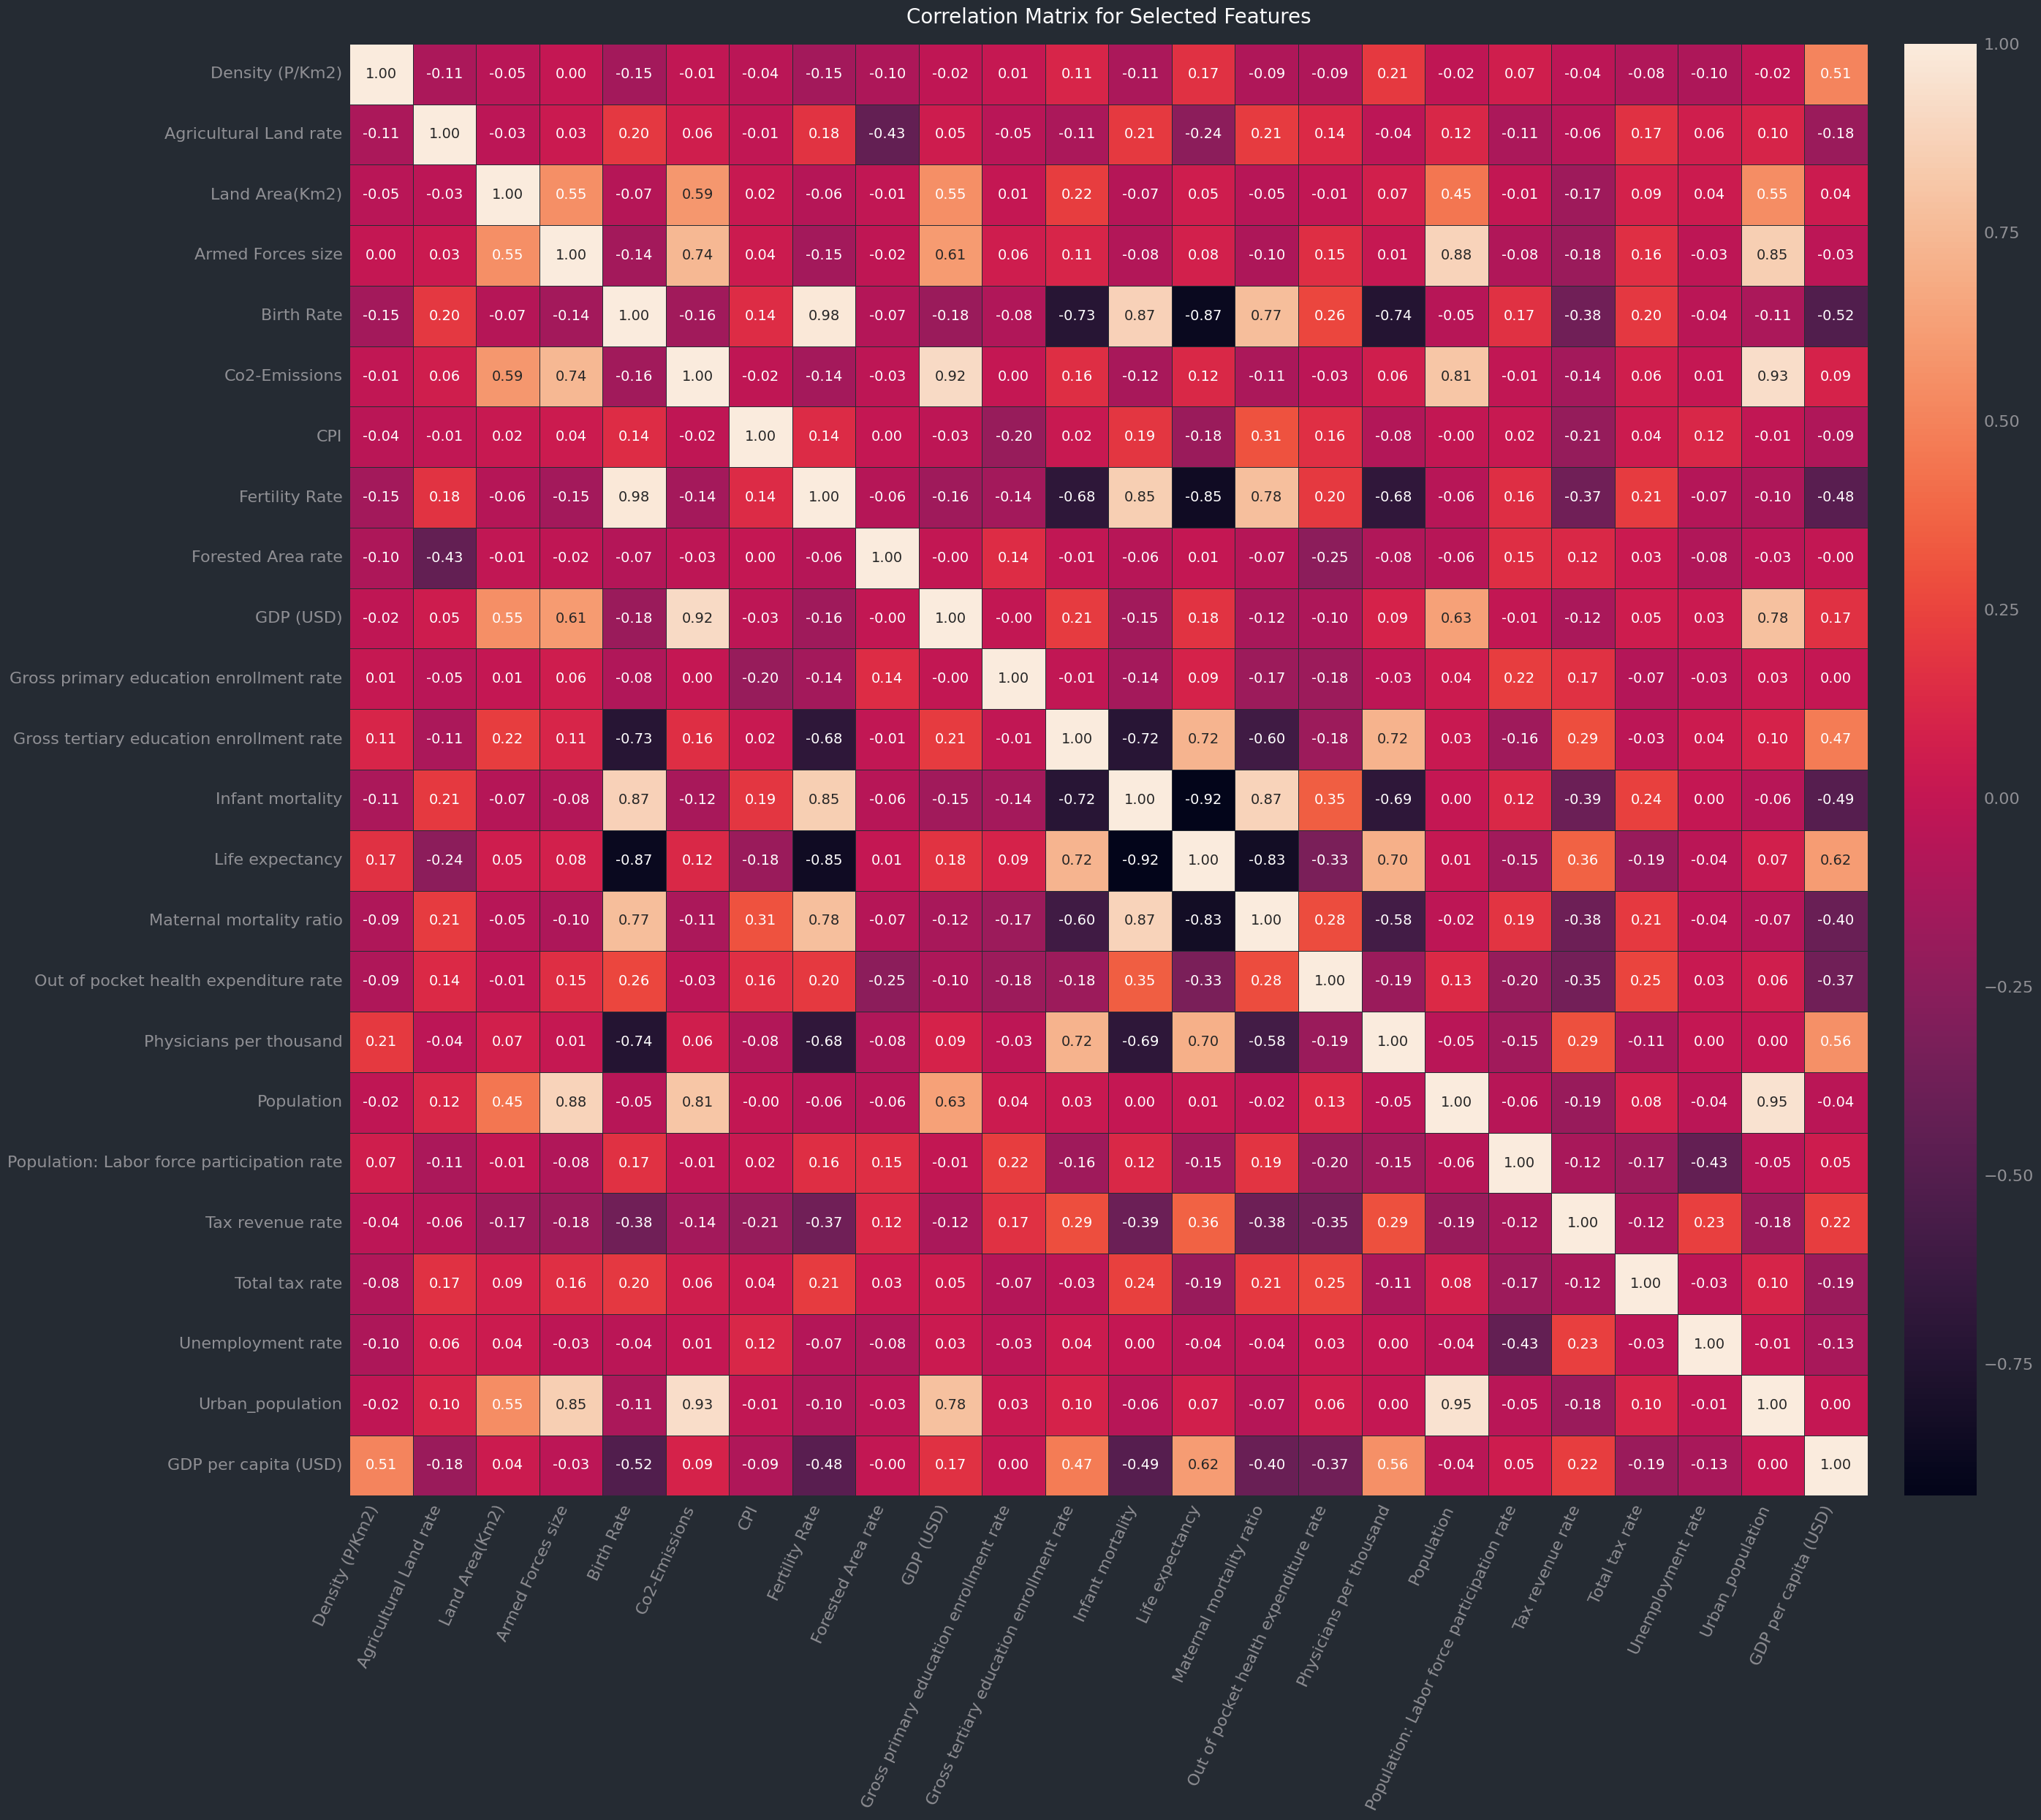

In [ ]:
# Check correlations for numerical dataframe with Seaborn heatmap
corr_matrix =  df[numeric_cols].corr()
# Set up matplotlib figure
fig, ax = plt.subplots(figsize=(30, 25))
# Set up heatmap
hmap = sns.heatmap(corr_matrix,
                   annot=True,
                   annot_kws={"size": 14},
                   fmt=".2f",
                   linewidth=0.5,
                   # cmap=custom_cmap,
                   linecolor=palette["dark"],
                   cbar_kws={"pad": 0.02}
)
# Remove ticks from x and y axes (left and bottom)
hmap.tick_params(left=False, bottom=False)
# Remove ticks from cbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(right=False)
# Set descriptors
hmap.set_title("Correlation Matrix for Selected Features",
               fontdict={"size": 20, "color": palette["light"]},
               pad=20)
plt.xticks(fontsize=16, color=palette["stone"], rotation=65, ha="right")
plt.yticks(fontsize=16, color=palette["stone"], rotation=0)
cbar.ax.tick_params(labelsize=16, labelcolor=palette["stone"])

plt.tight_layout()
plt.show()

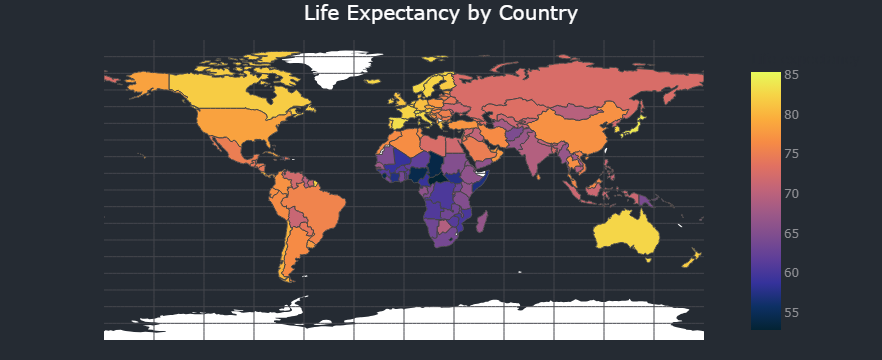

In [ ]:
fig = px.choropleth(df, locations="Abbreviation",
                    locationmode="ISO-3",
                    color="Life expectancy",
                    hover_name="Country",
                    color_continuous_scale="thermal")
# Customise hover text
fig.update_traces(hovertemplate="<b>Country:</b> %{hovertext}<br><b>Life Expectancy:</b> %{z}")

fig.update_geos(projection_scale=1, visible=False)
fig.update_geos(landcolor="white", showocean=True, oceancolor=palette["dark"])
fig.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True,
                lataxis_gridcolor=palette["grey"], lonaxis_gridcolor=palette["grey"])
# Update colorbar title and labels color
fig.update_layout(title="Life Expectancy by Country",
                  title_font_size=20, title_font_color=palette["light"],
                  coloraxis_colorbar_title_font_color=palette["dark"],
                  coloraxis_colorbar_tickfont_color=palette["stone"])

format_plot(fig)
fig.show()

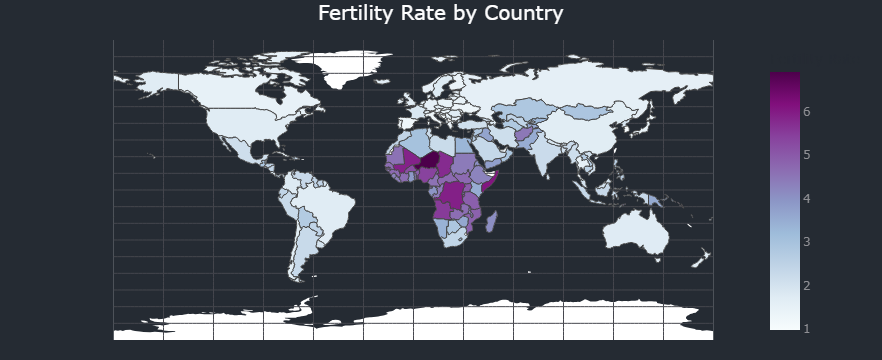

In [ ]:
fig = px.choropleth(df, locations="Abbreviation",
                    locationmode="ISO-3",
                    color="Fertility Rate",
                    hover_name="Country",
                    color_continuous_scale="bupu")
# Customise hover text
fig.update_traces(hovertemplate="<b>Country:</b> %{hovertext}<br><b>Fertility Rate:</b> %{z}")

fig.update_geos(projection_scale=1, visible=False)
fig.update_geos(landcolor="white", showocean=True, oceancolor=palette["dark"])
fig.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True,
                lataxis_gridcolor=palette["grey"], lonaxis_gridcolor=palette["grey"])
# Update colorbar title and labels color
fig.update_layout(title="Fertility Rate by Country",
                  title_font_size=20, title_font_color=palette["light"],
                  coloraxis_colorbar_title_font_color=palette["dark"],
                  coloraxis_colorbar_tickfont_color=palette["stone"])

format_plot(fig)
fig.show()

### Comment

Eyeballing the Fertility Rate by Country plot, the situation appears to be the inverse of the Life Expectancy by Country plot. Indeed, the correlation heatmap identified a -0.85 negative correlation between fertility rate and life expectancy.

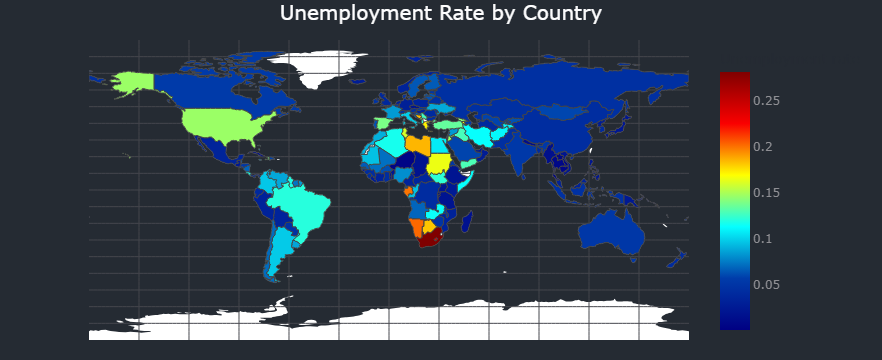

In [ ]:
fig = px.choropleth(df, locations="Abbreviation",
                    locationmode="ISO-3",
                    color="Unemployment rate",
                    hover_name="Country",
                    color_continuous_scale="jet")
# Customise hover text
fig.update_traces(hovertemplate="<b>Country:</b> %{hovertext}<br><b>Unemployment Rate:</b> %{z:.2%}")

fig.update_geos(projection_scale=1, visible=False)
fig.update_geos(landcolor="white", showocean=True, oceancolor=palette["dark"])
fig.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True,
                lataxis_gridcolor=palette["grey"], lonaxis_gridcolor=palette["grey"])
# Update colorbar title and labels color
fig.update_layout(title="Unemployment Rate by Country",
                  title_font_size=20, title_font_color=palette["light"],
                  coloraxis_colorbar_title_font_color=palette["dark"],
                  coloraxis_colorbar_tickfont_color=palette["stone"])

format_plot(fig)
fig.show()

### Comment

Note that the unemployment rate for the US appears erroneous: it suggests a rate of 14.7% for 2023, whereas the current unemployment rate in the US as of January 2024 is approximately 3.7%. Data a selection of other countries appears approximately correct, suggesting that it is an issue with the data rather than the formatting process demonstrated earlier.

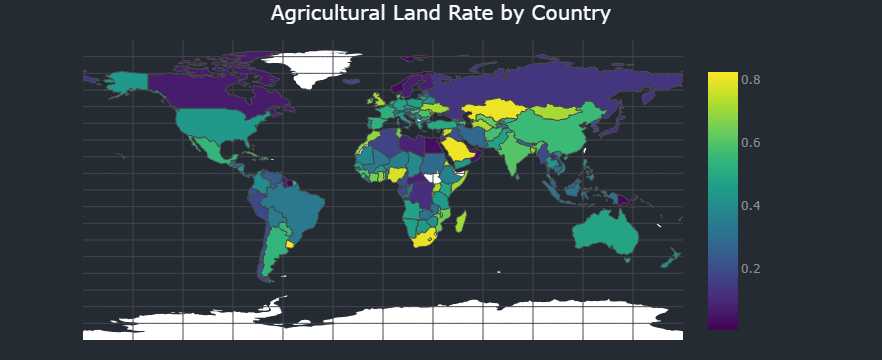

In [ ]:
fig = px.choropleth(df, locations="Abbreviation",
                    locationmode="ISO-3",
                    color="Agricultural Land rate",
                    hover_name="Country",
                    color_continuous_scale="viridis")
# Customise hover text
fig.update_traces(hovertemplate="<b>Country:</b> %{hovertext}<br><b>Agricultural Land Rate:</b> %{z:.2%}")

fig.update_geos(projection_scale=1, visible=False)
fig.update_geos(landcolor="white", showocean=True, oceancolor=palette["dark"])
fig.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True,
                lataxis_gridcolor=palette["grey"], lonaxis_gridcolor=palette["grey"])
# Update colorbar title and labels color
fig.update_layout(title="Agricultural Land Rate by Country",
                  title_font_size=20, title_font_color=palette["light"],
                  coloraxis_colorbar_title_font_color=palette["dark"],
                  coloraxis_colorbar_tickfont_color=palette["stone"])

format_plot(fig)
fig.show()

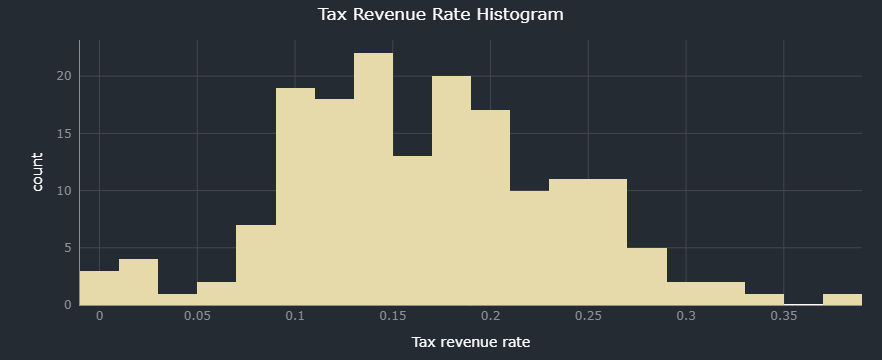

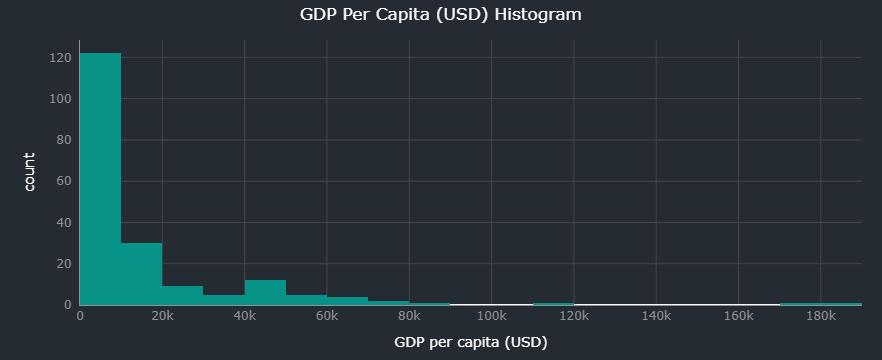

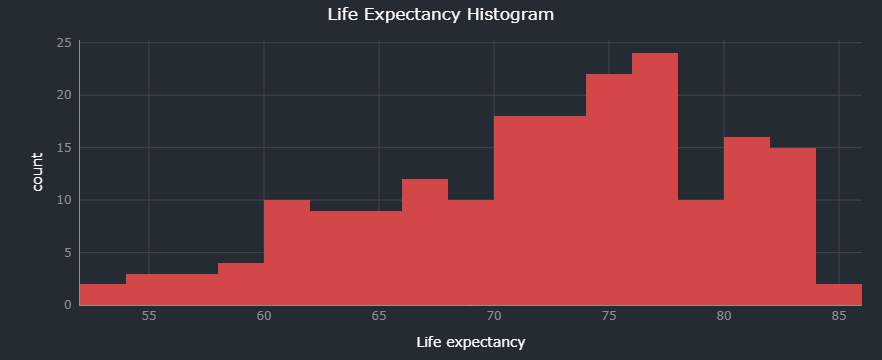

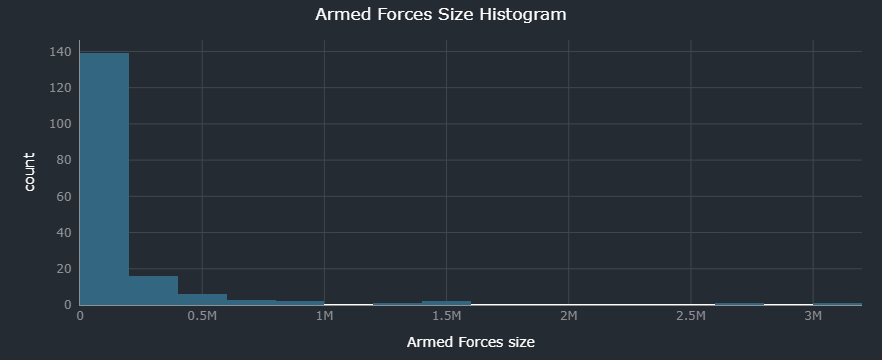

In [ ]:
# Plot histograms
fig_tax = px.histogram(df, x="Tax revenue rate", nbins=20,
                       title="Tax Revenue Rate Histogram", color_discrete_sequence=[palette["yellow"]])
fig_gdp_percap = px.histogram(df, x="GDP per capita (USD)", nbins=20,
                              title="GDP Per Capita (USD) Histogram", color_discrete_sequence=[palette["green"]])
fig_life_expectancy = px.histogram(df, x="Life expectancy", nbins=20,
                                   title="Life Expectancy Histogram", color_discrete_sequence=[palette["red"]])
fig_armed_forces = px.histogram(df, x="Armed Forces size", nbins=20,
                                title="Armed Forces Size Histogram", color_discrete_sequence=[palette["blue"]])
# Apply custom theme
format_plot(fig_tax)
format_plot(fig_gdp_percap)
format_plot(fig_life_expectancy)
format_plot(fig_armed_forces)
# Display plots
fig_tax.show()
fig_gdp_percap.show()
fig_life_expectancy.show()
fig_armed_forces.show()

The small selection of histograms above display a range of different trends across the world.

Tax revenue (top, yellow) shows an approximate normal distribution in terms of the tax revenus as a percentage of GDP. The second plot (green) shows that around 2/3 of countries have GDP per capita below USD10,000; a long and narrow right-hand tail reveals the extreme relative wealth of just a few outliers.

The life expectancy histogram (red) shows negative skew, with most countries tending towards higher life expectancy. The differential is less stark than for GDP per capita, though this is natural given that the possible range of human life expectancy is far more limited than GDP.

Finally, the armed forces histogram (blue) shows a similarly extreme positive skew to that of the GDP per capita plot. Here, nominal population sizes will play a large part in these figures (recall the positive 0.88 correlation between population and armed forces size from the heatmap).

## National wealth and national health

This section will focus on exploring relationships between a country's relative wealth - as measured by GDP per capita - and population health and well-being metrics such as life expectancy, infant mortality, and other relevant features within the dataset.

In [ ]:
selected_cols = [
    "Country", "Abbreviation", "GDP per capita (USD)",
    "Life expectancy", "Fertility Rate", "Birth Rate",
    "Infant mortality", "Maternal mortality ratio",
    "Gross primary education enrollment rate", "Gross tertiary education enrollment rate",
    "Physicians per thousand", "Out of pocket health expenditure rate"
]

In [ ]:
health_df = df[selected_cols]

In [ ]:
health_df.iloc[[0, -1]]

Country Abbreviation  GDP per capita (USD)  Life expectancy  \
0    Afghanistan          AFG                   502             64.5   
192     Zimbabwe          ZWE                  1463             61.2   

     Fertility Rate  Birth Rate  Infant mortality  Maternal mortality ratio  \
0              4.47       32.49              47.9                     638.0   
192            3.62       30.68              33.9                     458.0   

     Gross primary education enrollment rate  \
0                                      1.040   
192                                    1.099   

     Gross tertiary education enrollment rate  Physicians per thousand  \
0                                       0.097                     0.28   
192                                     0.100                     0.21   

     Out of pocket health expenditure rate  
0                                    0.784  
192                                  0.258

In [ ]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   193 non-null    object 
 1   Abbreviation                              193 non-null    object 
 2   GDP per capita (USD)                      193 non-null    int32  
 3   Life expectancy                           187 non-null    float64
 4   Fertility Rate                            188 non-null    float64
 5   Birth Rate                                189 non-null    float64
 6   Infant mortality                          189 non-null    float64
 7   Maternal mortality ratio                  181 non-null    float64
 8   Gross primary education enrollment rate   188 non-null    float64
 9   Gross tertiary education enrollment rate  183 non-null    float64
 10  Physicians per thousand               

### Distribution plots

In [ ]:
health_cols =  [
    "Life expectancy", "Fertility Rate", "Birth Rate",
    "Infant mortality", "Maternal mortality ratio",
    "Physicians per thousand", "Out of pocket health expenditure rate"
]

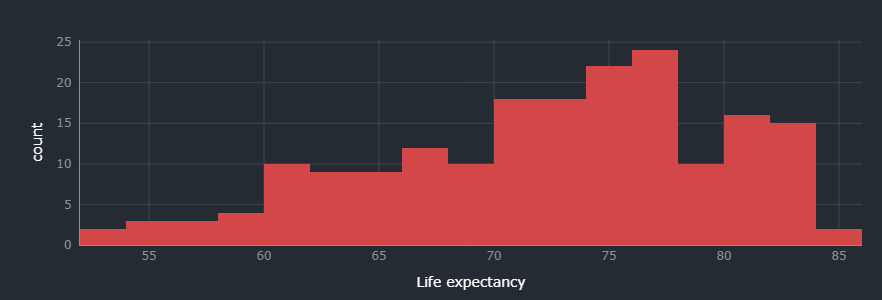

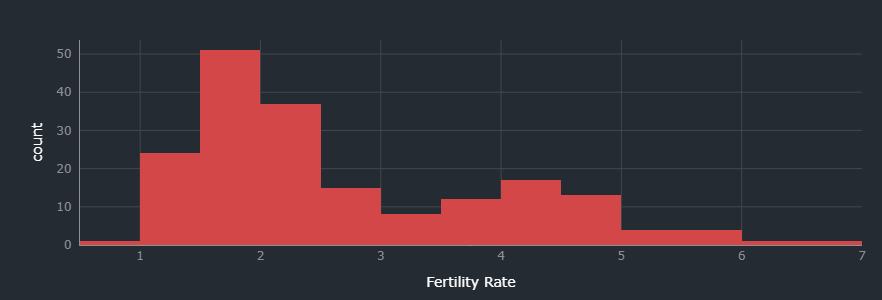

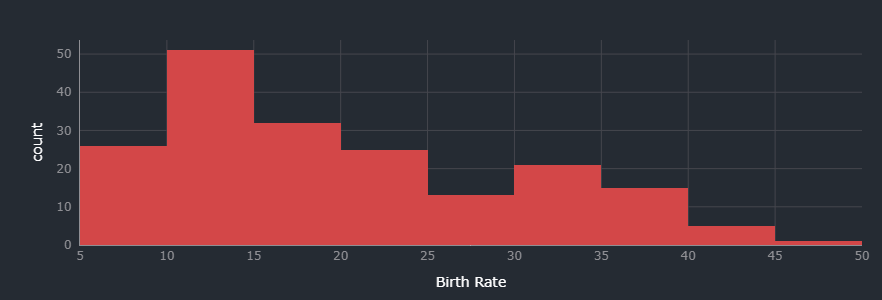

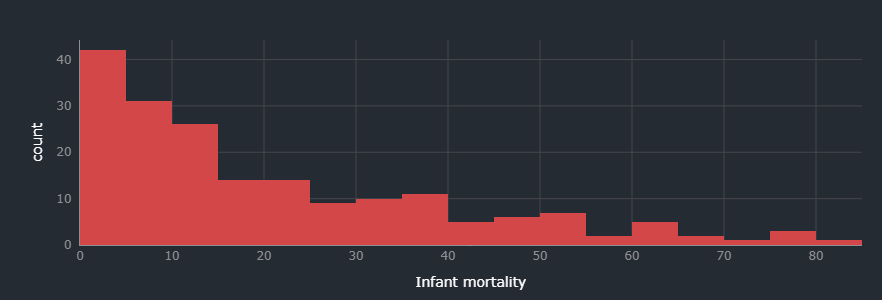

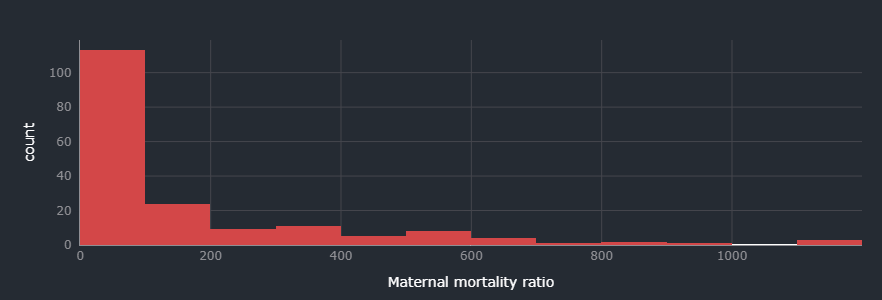

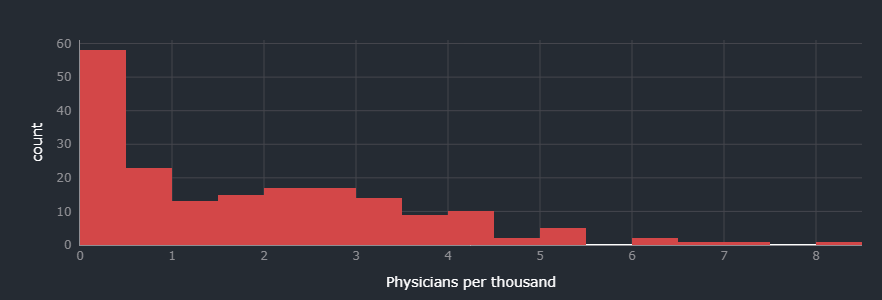

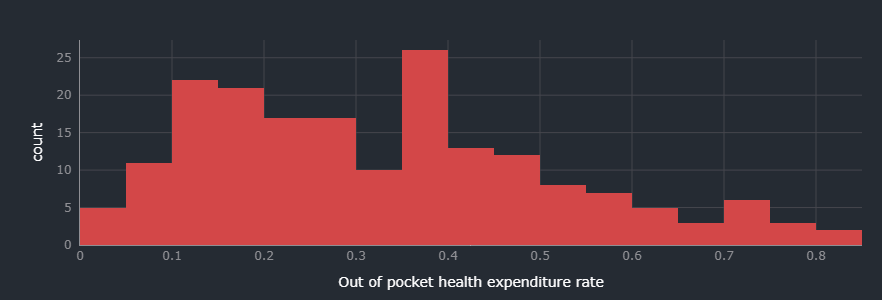

In [ ]:
for col in health_cols:
    fig = px.histogram(health_df, x=col, color_discrete_sequence=[palette["red"]])
    fig.update_layout(height=300, width=750)
    format_plot(fig)
    fig.show()

In [ ]:
health_df.describe()

GDP per capita (USD)  Life expectancy  Fertility Rate  Birth Rate  \
count            193.000000       187.000000      188.000000  189.000000   
mean           15690.383420        72.279679        2.698138   20.214974   
std            25268.402872         7.483661        1.282267    9.945774   
min              261.000000        52.800000        0.980000    5.900000   
25%             1912.000000        67.000000        1.705000   11.300000   
50%             5955.000000        73.200000        2.245000   17.950000   
75%            17401.000000        77.500000        3.597500   28.750000   
max           184396.000000        85.400000        6.910000   46.080000   

       Infant mortality  Maternal mortality ratio  \
count        189.000000                181.000000   
mean          21.332804                160.392265   
std           19.548058                233.502024   
min            1.400000                  2.000000   
25%            6.000000                 13.000000   
50%           14.000000                 53.000000   
75%           32.700000                186.000000   
max           84.500000               1150.000000   

       Gross primary education enrollment rate  \
count                               188.000000   
mean                                  1.024702   
std                                   0.131516   
min                                   0.234000   
25%                                   0.989500   
50%                                   1.025500   
75%                                   1.080250   
max                                   1.425000   

       Gross tertiary education enrollment rate  Physicians per thousand  \
count                                183.000000               188.000000   
mean                                   0.379634                 1.839840   
std                                    0.292610                 1.684261   
min                                    0.008000                 0.010000   
25%                                    0.121500                 0.332500   
50%                                    0.312000                 1.460000   
75%                                    0.631500                 2.935000   
max                                    1.366000                 8.420000   

       Out of pocket health expenditure rate  
count                             188.000000  
mean                                0.326372  
std                                 0.191727  
min                                 0.002000  
25%                                 0.174500  
50%                                 0.307000  
75%                                 0.439750  
max                                 0.816000

### Correlation analysis

In [ ]:
numeric_cols = [
    "GDP per capita (USD)", "Life expectancy", "Fertility Rate", "Birth Rate",
    "Infant mortality", "Maternal mortality ratio",
    "Gross primary education enrollment rate", "Gross tertiary education enrollment rate",
    "Physicians per thousand", "Out of pocket health expenditure rate"
]

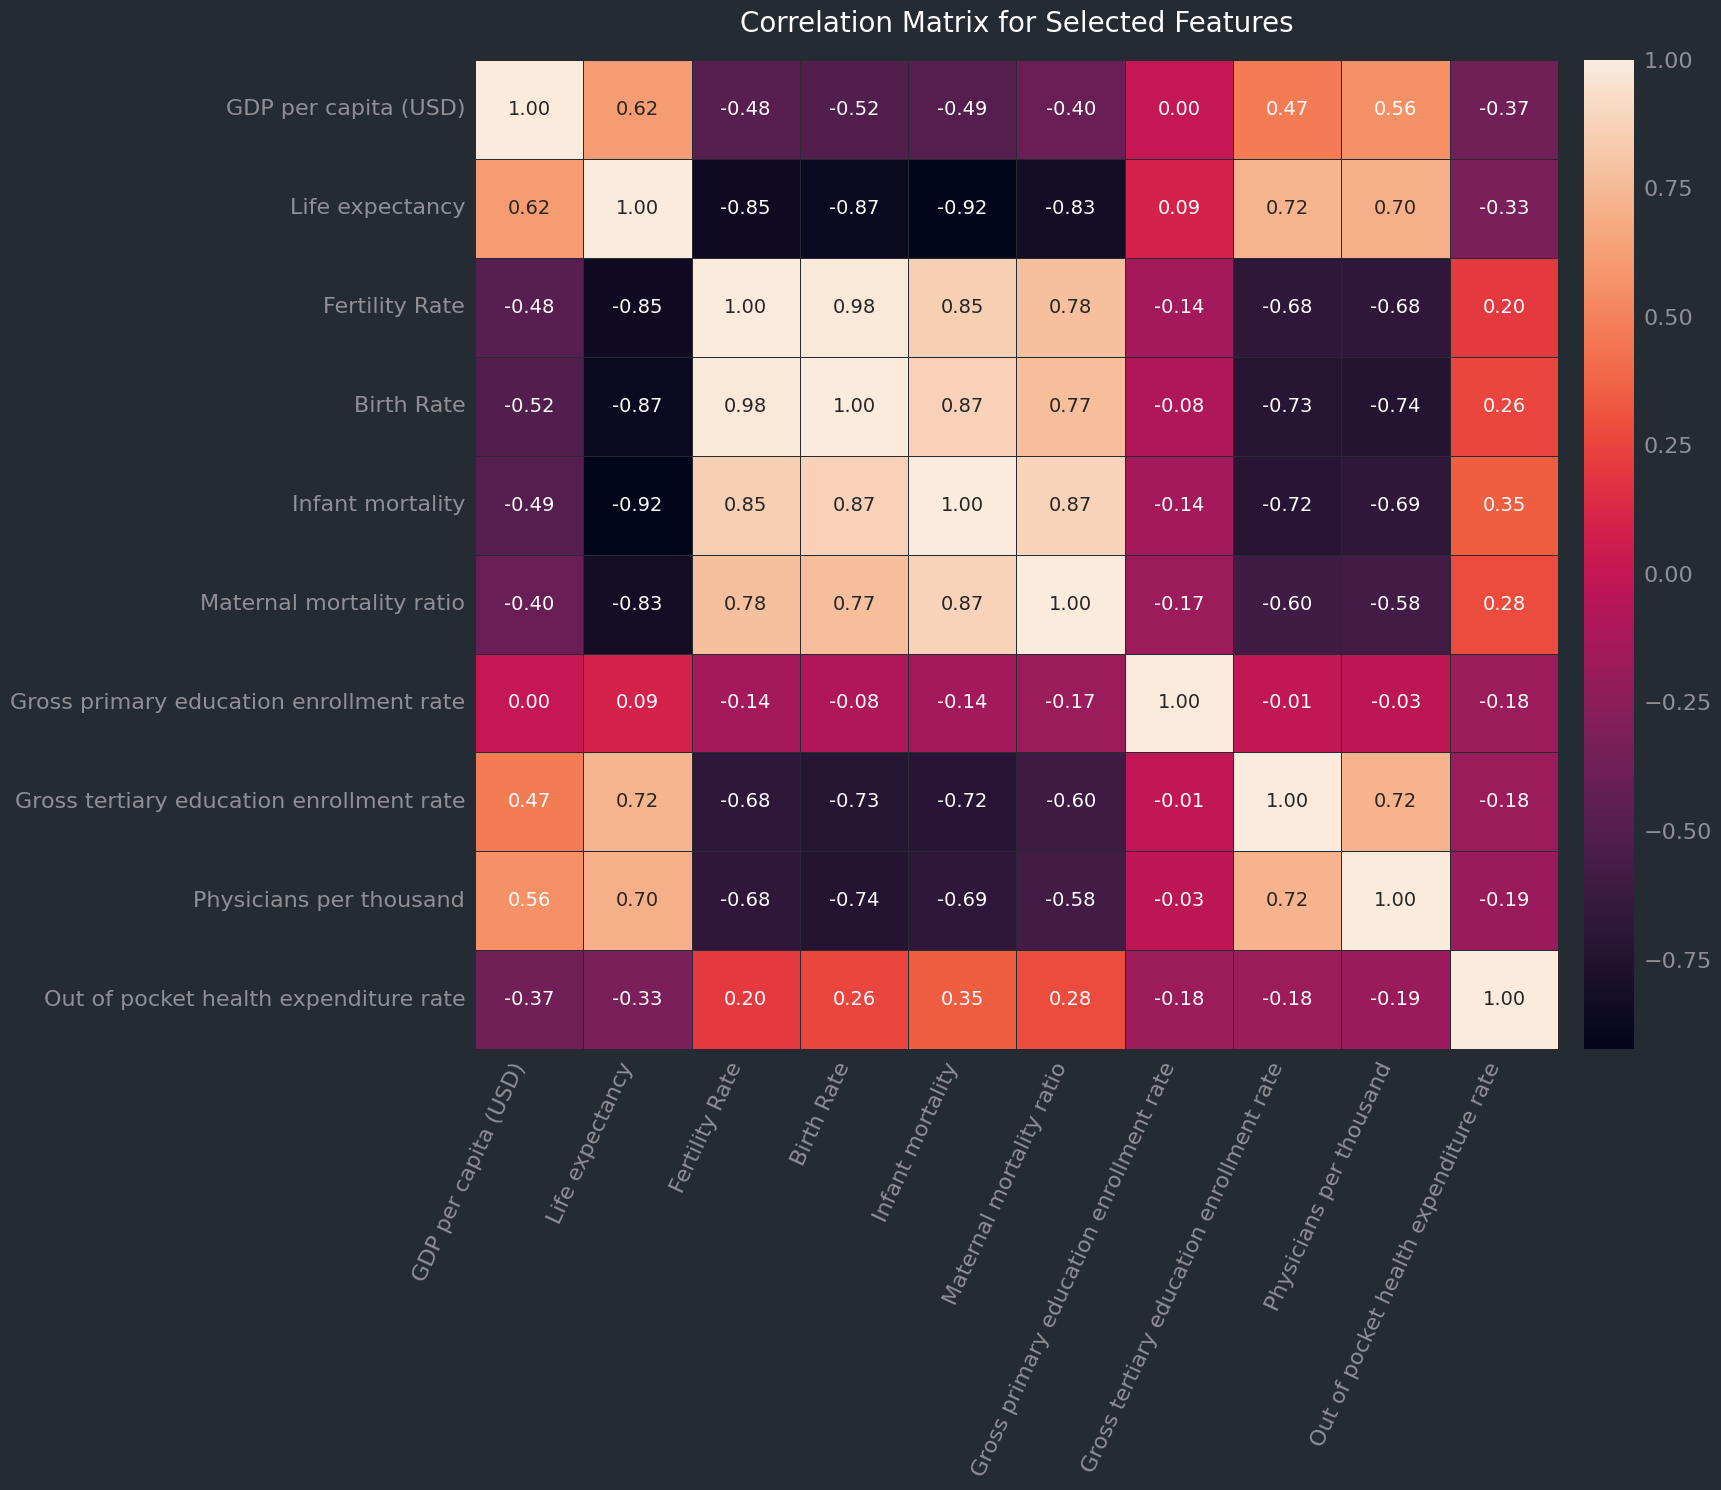

In [ ]:
# Check correlations for numerical dataframe with Seaborn heatmap
corr_matrix =  health_df[numeric_cols].corr()
# Set up matplotlib figure
fig, ax = plt.subplots(figsize=(18, 15))
# Set up heatmap
hmap = sns.heatmap(corr_matrix,
                   annot=True,
                   annot_kws={"size": 14},
                   fmt=".2f",
                   linewidth=0.5,
                   # cmap=custom_cmap,
                   linecolor=palette["dark"],
                   cbar_kws={"pad": 0.02}
)
# Remove ticks from x and y axes (left and bottom)
hmap.tick_params(left=False, bottom=False)
# Remove ticks from cbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(right=False)
# Set descriptors
hmap.set_title("Correlation Matrix for Selected Features",
               fontdict={"size": 20, "color": palette["light"]},
               pad=20)
plt.xticks(fontsize=16, color=palette["stone"], rotation=65, ha="right")
plt.yticks(fontsize=16, color=palette["stone"], rotation=0)
cbar.ax.tick_params(labelsize=16, labelcolor=palette["stone"])

plt.tight_layout()
plt.show()

Unsurprisingly, life expectancy has a close to perfect negative correlation with infant mortality, and strong negative correlations with maternal mortality. The similarly strong negative correlation with birth rate and fertility rate is in line with generally acknowledged truths regarding global human development.

Life expectancy has a moderately strong positive correlation with GDP per capita (USD), suggesting that an increase in national wealth is only partly responsible for its population's increased life expectancy. This is intuitive, since GDP per capita reveals only part of a country's economic profile, and says nothing regarding the presence or lack of a robust national health system, the availability of doctors for those from lower incomes, or of a range of sociocultural factors that impact upon the health of a populace.

Note that primary education enrollment has a negligible correlation with life expectancy (+0.09), wheras the correlation with tertiary education enrollment is strongly positive (+0.72). A simple supposition for this is that most of today's countries, rich and poor, do support primary education systems for the bulk of their populations. Tertiary education, though prevalent in industrialised countries, remains a luxury in many parts of the world, and its absence is likely to coincide with other forms of privation.

The following figure plots GDP per capita (USD) against life expectancy. Liechenstein and Luxembourg are outliers in terms of GBP per capita, and are not included in order to make the rest of the points more visible.

In [ ]:
drop_outliers = health_df[health_df["Country"].isin(["Liechtenstein", "Luxembourg"]) == False]

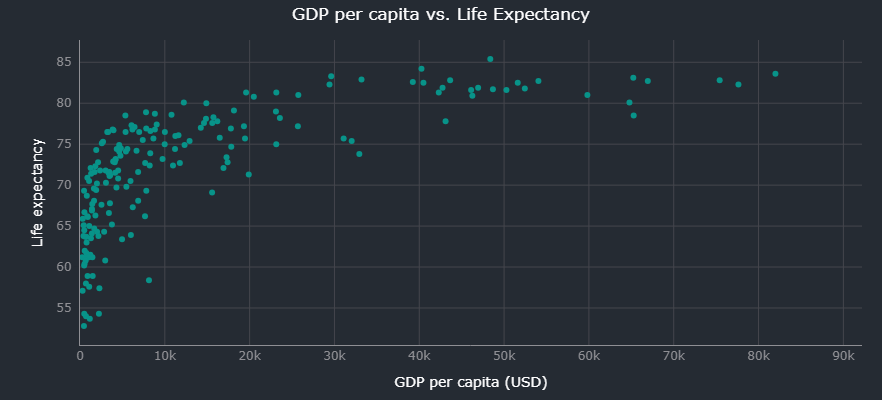

In [ ]:
fig = px.scatter(drop_outliers, x="GDP per capita (USD)", y="Life expectancy", hover_name="Country",
                 title="GDP per capita vs. Life Expectancy", color_discrete_sequence=[palette["green"]])
fig.update_layout(height=400, width=800)
# Customise hover text
fig.update_traces(hovertemplate="<b>Country:</b> %{hovertext}<br><b>GDP per capita (USD):</b> %{x}<br><b>Life expectancy:</b> %{y:.2f}")
# Adjust x-axis scale
fig.update_xaxes(range=[0, drop_outliers["GDP per capita (USD)"].max() * 0.5])
format_plot(fig)
fig.show()

From the above plot, we can observe that strong GDP per capita is not a pre-requisite for an intermediate level of life expectancy; many countries - such as Albania and Lebanon - enjoy decent life expectancy averages despite low GDP per capita values (78.5 years and USD5,352 for Albania, and 78.9 years and USD7,784 for Lebanon). However, we can see that GDP per capita appears to offer a longevity safety net: no country with a GDP per capita above USD20,000 has an average life expectancy below 75 (Saudi Arabia), whereas the other side of this divide ranges as low as just 52.8 years (in the Central African Republic), and the majority of those countries are bunched between the 60 to 75 years range.

Among the wealthiest countries (per capita), there is considerable variance, however, which shows that GDP per capita weakens in explanatory power towards the upper end.

The scatter matrix below pairs each of the selected features indicated in the next cell.

In [ ]:
health_cols = [
    "GDP per capita (USD)", "Life expectancy", "Birth Rate",
    "Infant mortality", "Maternal mortality ratio",
    "Physicians per thousand", "Out of pocket health expenditure rate"
]

In [ ]:
health_metrics = health_df[health_cols]

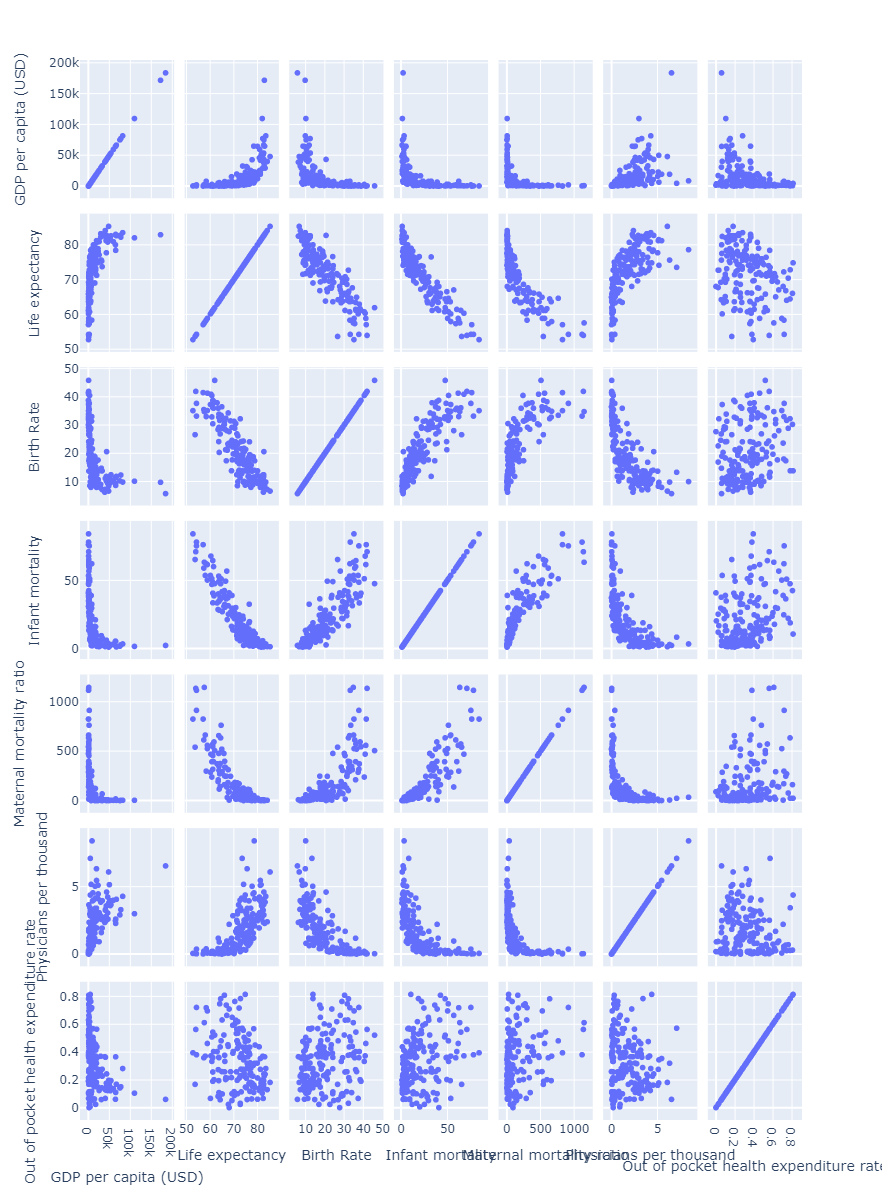

In [ ]:
fig = px.scatter_matrix(health_metrics)
fig.update_layout(height=1200, width=900)
fig.show()

#### Comment - Numbers of physicians and childbirth-related deaths

An interesting relationship can be observed regarding the number of physicians per thousand. Recall from our correlation heatmap that there is a positive correlation (+0.72) between tertiary education enrollement and the number of physicians, and a more moderate positive correlation (+0.56) between GDP per capita (USD) and the number of physicians.

Here in the pairplots between numbers of physicians and both infant and maternal mortality, we can see the suppressing effect that an increase in medical professionals has on the numbers of childbirth-related deaths. Though the figures can vary broadly across countries, when the number of physicians is minimal, beyond a low threshold of physician numbers, childbirth-related deaths are generally controlled.

This finding is intuitive, since childbirth-related deaths are often the result of complications that could be avoided in the presence of trained personnel.

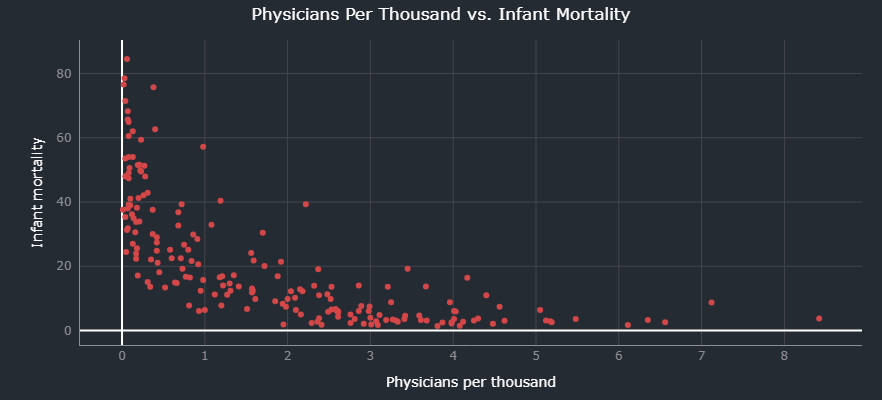

In [ ]:
fig = px.scatter(health_df, x="Physicians per thousand", y="Infant mortality", hover_name="Country",
                 title="Physicians Per Thousand vs. Infant Mortality", color_discrete_sequence=[palette["red"]])
fig.update_layout(height=400, width=800)
# Customise hover text
fig.update_traces(hovertemplate="<b>Country:</b> %{hovertext}<br><b>Physicians/1000:</b> %{x}<br><b>Infant mortality/1000:</b> %{y:.2f}")
format_plot(fig)
fig.show()

#### Comment - birth rate

Note also that a higher birth rate coincides with higher rates of infant and maternal mortality, and general life expectancy. The correlation heatmap earlier displayed these correlations, respectively, as +0.87, +0.77, and -0.87.

It is generally accepted that increased access to education for women is associated with lower birth rates, and lower childbirth-related deaths.

This hypothesis appears to be borne out by the negative correlation (-0.73) between birth rate and tertiary education enrollment.

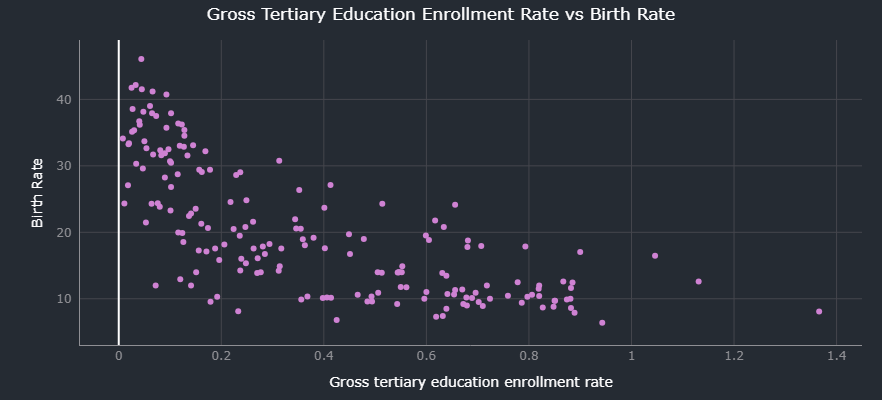

In [ ]:
fig = px.scatter(health_df, x="Gross tertiary education enrollment rate", y="Birth Rate", hover_name="Country",
                 title="Gross Tertiary Education Enrollment Rate vs Birth Rate", color_discrete_sequence=[palette["pink"]])
fig.update_layout(height=400, width=800)
# Customise hover text
fig.update_traces(hovertemplate="<b>Country:</b> %{hovertext}<br><b>Tertiary enrollment:</b> %{x:.1%}<br><b>Birth rate/1000:</b> %{y:.2f}")
format_plot(fig)
fig.show()

#### Comment - out of pocket health expenditure rate

In the scatter plot matrix displayed earlier, the "Out of pocket health expenditure rate" (OPHER) appeared to exhibit a more complex relationship with the other variables.

OPHER captures the proportion of medical expenses that are covered by the individual receiving treatment. Though it is not specified, the remaining portion is presumably covered by the government or a non-governmental organisation (NGO), such as the Red Cross or Medecin Sans Frontieres to name two prominent examples.

There are likely several explanations for the more complex relationship this variable holds with the other features. Wealthy countries may be able to provide a national health service that covers most expenses for the patient (albeit funded through taxation), or on the other hand their citizens may be better able to afford direct coverage of their own expenses.

In developing countries, governments may lack the funds to provide basic healthcare, and therefore require citizens to seek their own source of funding for medical needs. Conversely, international aid from NGOs or direct transfers from foreign governments may play a role in reducing the need for patients in developing countries to directly fund their own care.

The figure below plots GDP per capita (USD) against OPHER.

In [ ]:
drop_outliers = health_df[health_df["Country"].isin(["Liechtenstein", "Luxembourg", "Monaco"]) == False]

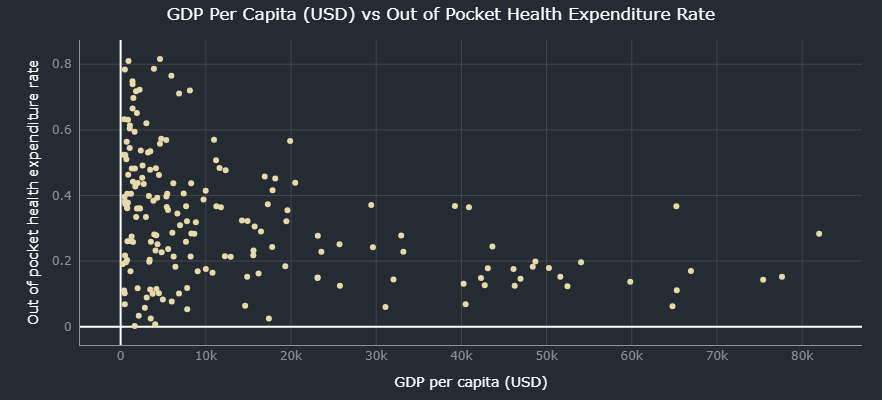

In [ ]:
fig = px.scatter(drop_outliers, x="GDP per capita (USD)", y="Out of pocket health expenditure rate",
                 hover_name="Country",
                 title="GDP Per Capita (USD) vs Out of Pocket Health Expenditure Rate",
                 color_discrete_sequence=[palette["yellow"]])
fig.update_layout(height=400, width=800)
# Customise hover text
fig.update_traces(hovertemplate="<b>Country:</b> %{hovertext}<br><b>GDP Per Capita (USD):</b> %{x}<br><b>Patient health expenditure rate:</b> %{y:.1%}")
format_plot(fig)
fig.show()

### Conclusion

This analysis has explored health statistics alongside a selection of key economic variables (principally GDP per capita) in an attempt to ascertain the relationships between national income and the health of a population.

Several key trends emerged. In general, though greater economic prosperity does not offer a full explanation of how countries achieve high life expectancy, the lack of economic prosperity is a clear obstacle for most countries that prevents their populace from enjoying longer lives.

A combination of factors is at play, and the causes are likely interrelated. For example, a greater number of physicians per population size is associated with much reduced infant and maternal mortality rates. Reduced mortality will also raise the proportion of individuals able to attend tertiary education, a small percentage of whom will themselves become physicians, or otherwise enjoy higher standards of living that support a longer life expectancy.

Perhaps the clearest correlation visible in this data is that a higher birth rate is associated with higher childbirth-related deaths. Tertiary education is correlated with reduced birth rates - in part due to the resultant decision-making power of women in determining their own family planning - and is a common policy objective in developmental economics.

Further analysis could be conducted, for example to explore the links between tax rates and employment levels with life expectancy and mortality, or the influence of population density and carbon dioxide emissions.